In [175]:
import numpy as np
import matplotlib.pyplot as plt
from astroML import stats as astroMLstats

In [302]:
N = 10000

In [303]:
chi  = np.random.uniform(0,1, size=N)

In [349]:
mu      = 1
sigma   = 0.02 

In [350]:
M0 = np.random.normal(mu, sigma, size=(N))

In [351]:
#M0 = np.abs(M0)

In [352]:
def f(chi):
    return np.sqrt(0.5 * (1 + np.sqrt(1-chi**2)))

In [353]:
M = M0 * f(chi)

Text(0.5, 0, '$\\mu$')

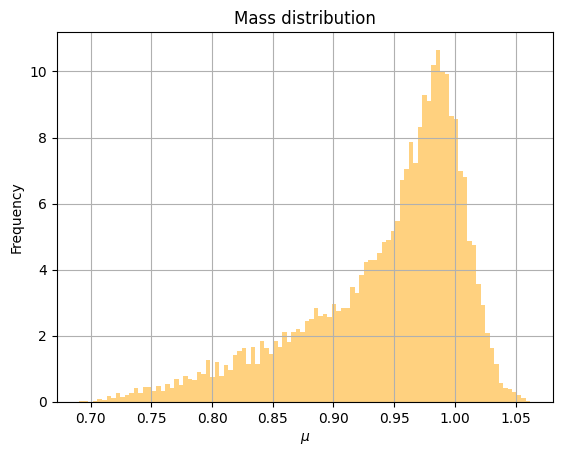

In [354]:
counts, bins, _ = plt.hist(M, bins=int(np.sqrt(M.shape[0])), histtype='bar', color='orange', alpha=0.5, label='Raw', density=True)
plt.grid()
plt.title('Mass distribution')
plt.ylabel('Frequency')
plt.xlabel(r'$\mu$')

In [355]:
scott_bins = np.arange(min(bins),max(bins), 3.5*M.std() / M.shape[0]**(1/3))
diaco_bins = np.arange(min(bins),max(bins), 2.7*astroMLstats.sigmaG(M) / M.shape[0]**(1/3))

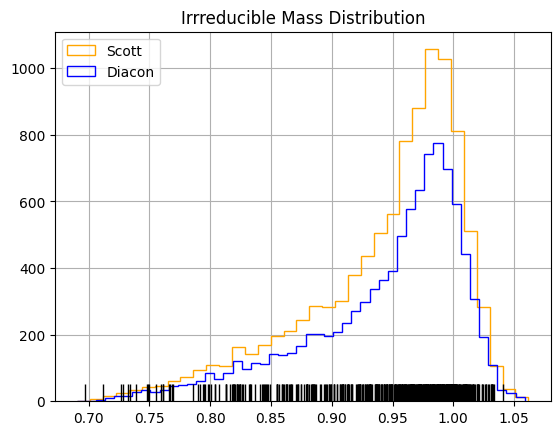

In [356]:
plt.title('Irrreducible Mass Distribution')
scott_y, scott_bins, _ = plt.hist(M, bins=scott_bins, histtype='step', color='orange', alpha=1, label='Scott')
diaco_y, diaco_bins, _ = plt.hist(M, bins=diaco_bins, histtype='step', color='blue', alpha=1, label='Diacon')
plt.plot(M[::20], 0*M[::20], '|', color='k', markersize=25);
plt.grid()
plt.legend()

In [357]:
scott_y_scaled = scott_y / (3.5*M.std() / M.shape[0]**(1/3) * N)
diaco_y_scaled = diaco_y / (2.7*astroMLstats.sigmaG(M) / M.shape[0]**(1/3) * N)

scott_y_scaled_err = np.sqrt(scott_y) / (3.5*M.std() / M.shape[0]**(1/3) * N)
diaco_y_scaled_err = np.sqrt(diaco_y) / (2.7*astroMLstats.sigmaG(M) / M.shape[0]**(1/3) * N)

In [358]:
scott_centers = 0.5 * (scott_bins[-1] - scott_bins[0]) * scott_bins[:-1]
diaco_centers = 0.5 * (diaco_bins[-1] - diaco_bins[0]) * diaco_bins[:-1]

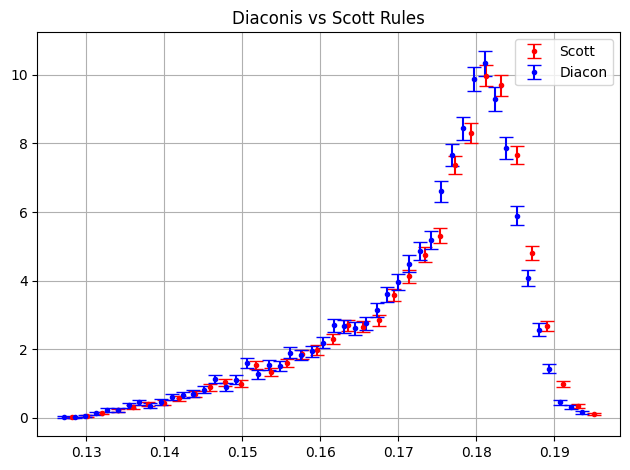

In [359]:
plt.errorbar(scott_centers, scott_y_scaled, yerr=scott_y_scaled_err, fmt='.', label='Scott', capsize=5, color='red')
plt.errorbar(diaco_centers, diaco_y_scaled, yerr=diaco_y_scaled_err, fmt='.', label='Diacon', capsize=5, color='blue')
plt.grid()
plt.title('Diaconis vs Scott Rules')
plt.legend()
plt.tight_layout()

0.17706666666666715


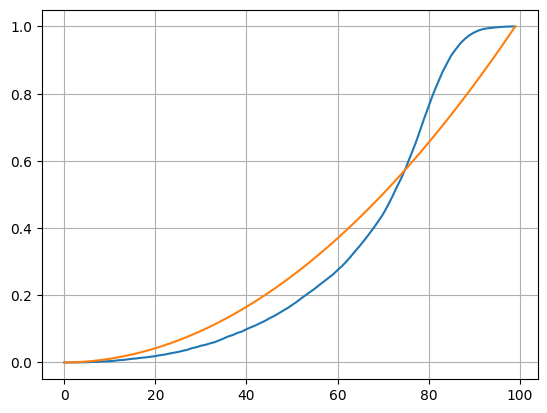

In [360]:
A = np.cumsum(counts)/np.sum(counts)
B = np.cumsum(np.arange(0,100,1) * f(1/2))/(np.sum(np.arange(0,100,1) * f(1/2)))
plt.plot(A,label='Scott Scaled')
plt.plot(B,label='Theoretical')
print(max(abs(B-A)))
plt.grid()

In [361]:
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(M.min(),M.max(),1000)

def kde_sklearn(data, bandwidth = 0.1, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

Text(0, 0.5, 'Density')

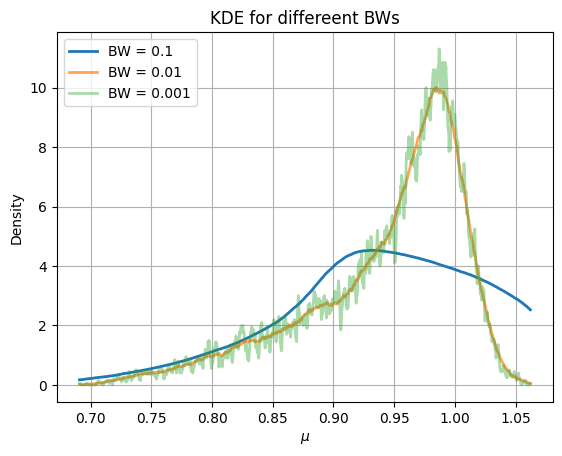

In [362]:
PDFtophat = kde_sklearn(M,bandwidth=0.01,kernel="tophat") 
plt.plot(xgrid,kde_sklearn(M,bandwidth=0.1,kernel="tophat"), label='BW = 0.1', linewidth=2);
plt.plot(xgrid,kde_sklearn(M,bandwidth=0.01,kernel="tophat"), label='BW = 0.01', linewidth=2, alpha=0.7);
plt.plot(xgrid,kde_sklearn(M,bandwidth=0.001,kernel="tophat"), label='BW = 0.001', linewidth=2, alpha=0.4);
plt.grid()
plt.legend()
plt.title('KDE for differeent BWs')
plt.xlabel(r'$\mu$')
plt.ylabel('Density')

In [363]:
from scipy.stats import ks_2samp

In [364]:
KS = ks_2samp(f(chi), M)

In [365]:
fs = f(chi)

In [366]:
print(f'KS value = {KS.statistic}')
print(f'P value = {KS.pvalue}')

KS value = 0.1595
P value = 2.227034447735828e-111


In [367]:
sigmas = np.linspace(0.001,0.1,100)
KSs_M = np.ones_like(sigmas)
KSs_f = np.ones_like(sigmas)
for i,sigma in enumerate(sigmas):
    M = np.random.normal(mu, sigma, size=(N))
    KSs_M[i] = ks_2samp(f(chi)*M, M).statistic
    KSs_f[i] = ks_2samp(f(chi), M).statistic

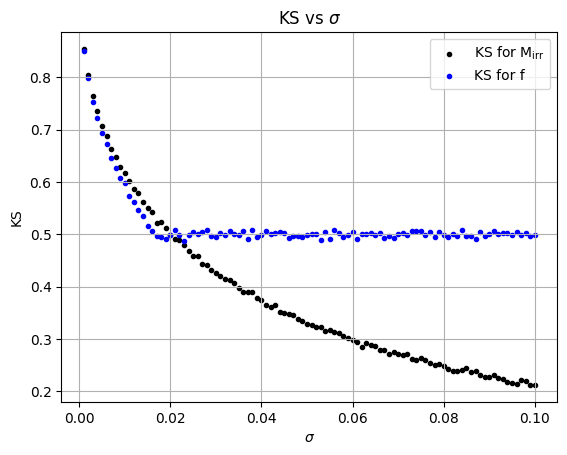

In [368]:
plt.scatter(sigmas, KSs_M, marker='.', color='k', label=r'KS for $\text{M}_{\text{irr}}$')
plt.scatter(sigmas, KSs_f, marker='.', color='b', label=r'KS for f')
plt.title(r'KS vs $\sigma$')
plt.xlabel(r'$\sigma$')
plt.ylabel('KS')
plt.grid()
plt.legend()